In [1]:
import torch
from torch.utils.data import Dataset,DataLoader,ConcatDataset
import random
import sys

from sklearn.metrics import confusion_matrix,accuracy_score
import numpy as np
import glob
import matplotlib.pyplot as plt
import cv2
from PIL import Image,ImageOps

In [2]:
path = "C:\\Users\\Muralidharansankar\\\\yes*.jpg"
tumor=[]

In [3]:
for i in glob.iglob(path):
    img=cv2.imread(f)
    tumor.append(img)

In [4]:
tumor=[]
import glob
import cv2

In [5]:
path = r"C:\Users\Muralidharansankar\python_mini_project\yes\*.jpg"
tumor=[]

In [6]:
for i in glob.iglob(path):
    img=cv2.imread(i)
    img =cv2.resize(img,(128,128))
    b,g,r=cv2.split(img)
    img=cv2.merge([r,g,b])
    tumor.append(img)

In [7]:
len(tumor)

154

In [8]:
# tumor

In [9]:
healthy=[]
path =r"C:\Users\Muralidharansankar\python_mini_project\no\*.jpg"
for i in glob.iglob(path):
    img=cv2.imread(i)
    img =cv2.resize(img,(128,128))
    b,g,r=cv2.split(img)
    img=cv2.merge([r,g,b])
    healthy.append(img)

In [10]:
len(healthy)

91

In [11]:
# for i in healthy:
#     print(i.shape)

In [12]:
tumor=np.array(tumor)
healthy=np.array(healthy)

In [13]:
tumor.shape

(154, 128, 128, 3)

In [14]:
healthy.shape

(91, 128, 128, 3)

In [15]:
al=np.concatenate((healthy,tumor))

In [16]:
al.shape

(245, 128, 128, 3)

In [17]:
healthy.shape[0]

91

In [18]:
def plot_random(healthy,tumor,num=5):
    plt.gcf().patch.set_facecolor('red')
    h_img=healthy[np.random.choice(healthy.shape[0],num,replace=False)]
    t_img=tumor[np.random.choice(tumor.shape[0],num,replace=False)]
    plt.figure(figsize=(15,9))
    for i in range(num):
        plt.subplot(1,num,i+1)
        plt.title("NOrmal")
        plt.imshow(h_img[i])
    plt.figure(figsize=(15,9))
   
    for i in range(num):
        plt.subplot(1,num,i+1)
        plt.title("tumor")
        plt.imshow(t_img[i])
        

<Figure size 640x480 with 0 Axes>

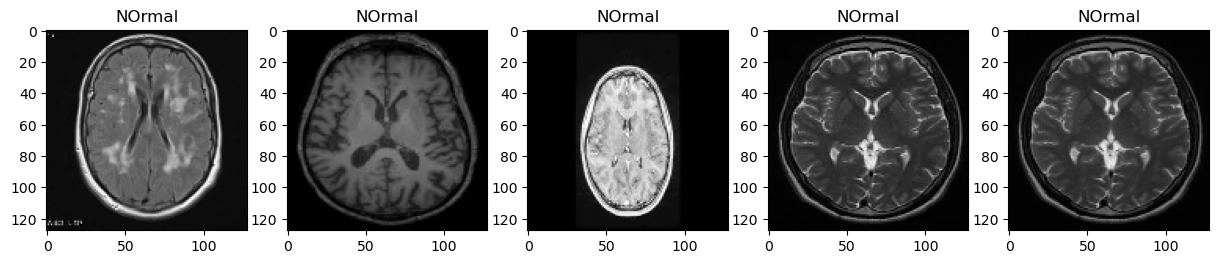

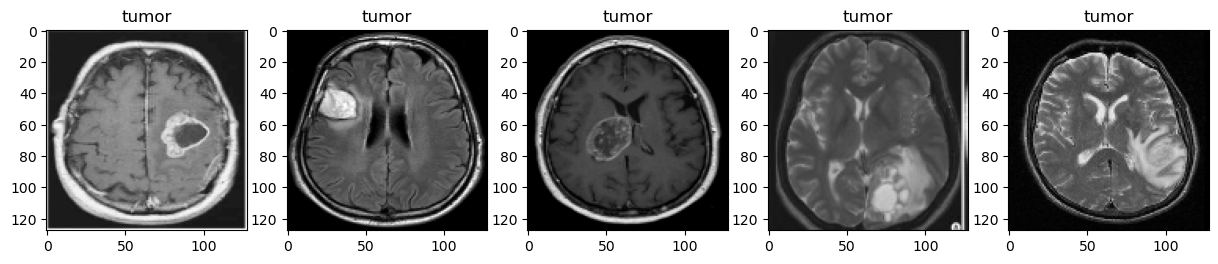

In [19]:
plot_random(healthy,tumor)

In [20]:
healthy.shape[0]

91

In [21]:
tumor.shape[0]

154

In [22]:
class Dataset(object):
    def __getitem__(self,index):
        raise NOTImplementError
    def __len__(self):
        raise nOTIMPLEMENTeRROR
    def __add__(self,other):
        return CancatDataset([self,other])
    

In [23]:
class MRI(Dataset):
    def __init__(self):
        healthy=[]
        tumor=[]
        path =r"C:\Users\Muralidharansankar\python_mini_project\no\*.jpg"
        for i in glob.iglob(path):
            img=cv2.imread(i)
            img =cv2.resize(img,(128,128))
            b,g,r=cv2.split(img)
            img=cv2.merge([r,g,b])
            healthy.append(img)
        path = r"C:\Users\Muralidharansankar\python_mini_project\yes\*.jpg"
        for i in glob.iglob(path):
            img=cv2.imread(i)
            img =cv2.resize(img,(128,128))
            b,g,r=cv2.split(img)
            img=cv2.merge([r,g,b])
            tumor.append(img)
        
        tumor=np.array(tumor,dtype=np.float32)
        healthy=np.array(healthy,dtype=np.float32)
        
        tumor_label=np.ones(tumor.shape[0],dtype=np.float32)
        healthy_label=np.zeros(healthy.shape[0],dtype=np.float32)
        
        
        self.images=np.concatenate((tumor,healthy),axis=0)
        self.labels=np.concatenate((tumor_label,healthy_label),axis=0)
    def __len__(self):
        return self.images.shape[0]
    def __getitem__(self,index):
        s={'image':self.images[index],'label':self.labels[index]}
        
        return s
    def normalize(self):
        self.images=self.images/255.0


In [24]:
tumor.shape

(154, 128, 128, 3)

In [25]:
mri=MRI()
mri.normalize()

In [26]:
len(mri)

245

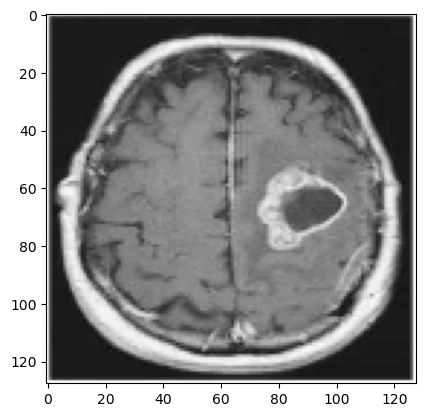

In [27]:
img=mri[1]['image']

plt.imshow(img)

In [28]:
img.shape

(128, 128, 3)

In [29]:
np.min(img)

0.07058824

In [30]:
mri.normalize()

In [31]:
img=mri[5]['image']

In [32]:
img.shape

(128, 128, 3)

In [33]:
np.min(img)

0.0001845444

In [34]:
np.max(img)

0.003921569

In [35]:
index= list(range(len(mri)))

In [36]:
random.shuffle(index)

In [37]:
img=mri[5]['image']

SystemExit: 

E:\anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


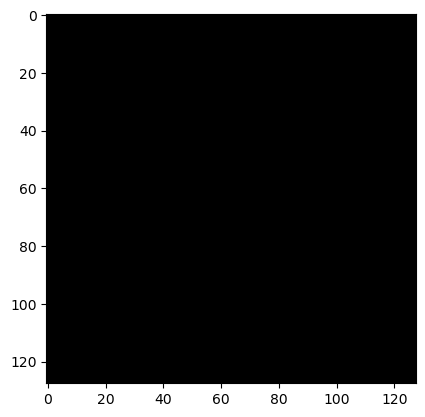

In [38]:
index=list(range(len(mri)))
random.shuffle(index)
for idx in index:
    
    img=mri[idx]['image']
    
    plt.imshow(img)

    sys.exit()

In [39]:
dataloader=DataLoader(mri)

In [40]:
# for sample in dataloader:
#     img=sample['image'].squeeze()
#     img=img.reshape(img.shape[1],img.shape[0],img.shape[2])
#     plt.imshow(img)
#     plt.show()


In [41]:
import torch.nn as nn
import torch.nn.functional as f


In [42]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.cnn_model=nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=5),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=5)
        )
        self.fc_model=nn.Sequential(
            nn.Linear(in_features=256, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=1)
        )
        
    def forward(self,x):
        x=self.cnn_model(x)
        x=x.reshape(x.size(0),-1)
        x=self.fc_model(x)
        x=torch.sigmoid(x)
        return x
    

In [43]:
model=CNN()

In [44]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [45]:
model.cnn_model[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))

In [46]:
# model.cnn_model[0].weight

In [47]:
model.cnn_model[0].weight.shape

torch.Size([6, 3, 5, 5])

In [48]:
model.cnn_model[0].weight[0].shape

torch.Size([3, 5, 5])

linear layer

In [49]:
model.fc_model[0]

Linear(in_features=256, out_features=120, bias=True)

In [50]:
model.fc_model[0].weight.shape

torch.Size([120, 256])

In [51]:
mri_dataset=MRI()
len(mri_dataset)

245

In [52]:
mri_dataset.normalize()
device = torch.device('cpu')  # Use CPU instead of GPU
model = CNN().to(device)   # Create an instance of the CNN class
# model = model.to(device)  # Move the model instance to the device (CPU)
len(mri_dataset)

245

In [53]:
dataloader=DataLoader(mri_dataset,batch_size=32,shuffle=False)
model.eval()
outputs=[]
y_true=[]


In [54]:

dataloader=DataLoader(mri_dataset,batch_size=32,shuffle=False)
model.eval()
outputs=[]
y_true=[]
with torch.no_grad():
    for i, D in enumerate(dataloader):
        image = D['image'].permute(0, 3, 1, 2).to(device)  # Permute dimensions to [batch_size, channels, height, width]
        label = D['label'].to(device)
        print(f"Batch {i+1}: Image shape: {image.shape}")
        y_hat = model(image)
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())
len(outputs)

Batch 1: Image shape: torch.Size([32, 3, 128, 128])
Batch 2: Image shape: torch.Size([32, 3, 128, 128])
Batch 3: Image shape: torch.Size([32, 3, 128, 128])
Batch 4: Image shape: torch.Size([32, 3, 128, 128])
Batch 5: Image shape: torch.Size([32, 3, 128, 128])
Batch 6: Image shape: torch.Size([32, 3, 128, 128])
Batch 7: Image shape: torch.Size([32, 3, 128, 128])
Batch 8: Image shape: torch.Size([21, 3, 128, 128])


8

In [55]:
outputs=np.concatenate(outputs,axis=0).squeeze()
y_true=np.concatenate(y_true,axis=0).squeeze()


In [56]:
outputs.shape

(245,)

In [57]:
# print(y_true)

In [58]:
def threshold(scores, threshold_value=0.50, minimum=0, maximum=1.0):
    x = np.array(scores)  # Convert scores to numpy array
    x[x >= threshold_value] = maximum
    x[x < threshold_value] = minimum
    return x

In [59]:
# accuracy_score(y_true,threshold(outputs))*100
threshold(outputs)
len(outputs)

245

In [60]:

len(outputs)

245

In [61]:
# import seaborn as sns
# plt.figure(figsize=(16,9))
# cm=confusion_matrix(y_true,threshold=(outputs))
# ax=plt.subplot()
# sns.heatmap(cm,annot='True',fmt='g',ax=ax,annot_kws={"size":20})

# ax.set_xlabel('predicted labels',fontsize=20)
# ax.set_ylabel('True labels',fontsize=20)
# ax.set_title("confusion matrix",fontsize=20)
# ax.xaxis.set_ticklabels(['healthy','tumor'],fontsize=20)
# ax.yaxis.set_ticklabels(['tumor','healthy'],fontsize=20)

In [62]:
# plt.figure(figsize=(16,9))
# cm = confusion_matrix(y_true, threshold=outputs)
# ax = plt.subplot()
# sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size":20})

# ax.set_xlabel('Predicted labels', fontsize=20)
# ax.set_ylabel('True labels', fontsize=20)
# ax.set_title("Confusion Matrix", fontsize=20)
# ax.xaxis.set_ticklabels(['healthy', 'tumor'], fontsize=20)
# ax.yaxis.set_ticklabels(['tumor', 'healthy'], fontsize=20)

# plt.show()
y_pred=outputs
len(y_pred)

245

In [63]:
# y_pred

In [64]:
y_pred=outputs

In [65]:
y_pred = np.where(outputs > 0.5, 1, 0)

In [66]:
# y_pred

In [67]:
# import seaborn as sns

# def confusion_m():
    
#     plt.figure(figsize=(16,9))
#     cm = confusion_matrix(y_true, y_pred)
#     ax = plt.subplot()
#     sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size":20}, cmap='Blues') 

#     ax.set_xlabel('Predicted labels', fontsize=20)
#     ax.set_ylabel('True labels', fontsize=20)
#     ax.set_title("Confusion Matrix", fontsize=20)
#     ax.xaxis.set_ticklabels(['healthy', 'tumor'], fontsize=20)
#     ax.yaxis.set_ticklabels(['tumor', 'healthy'], fontsize=20)

#     plt.show()
# confusion_m()

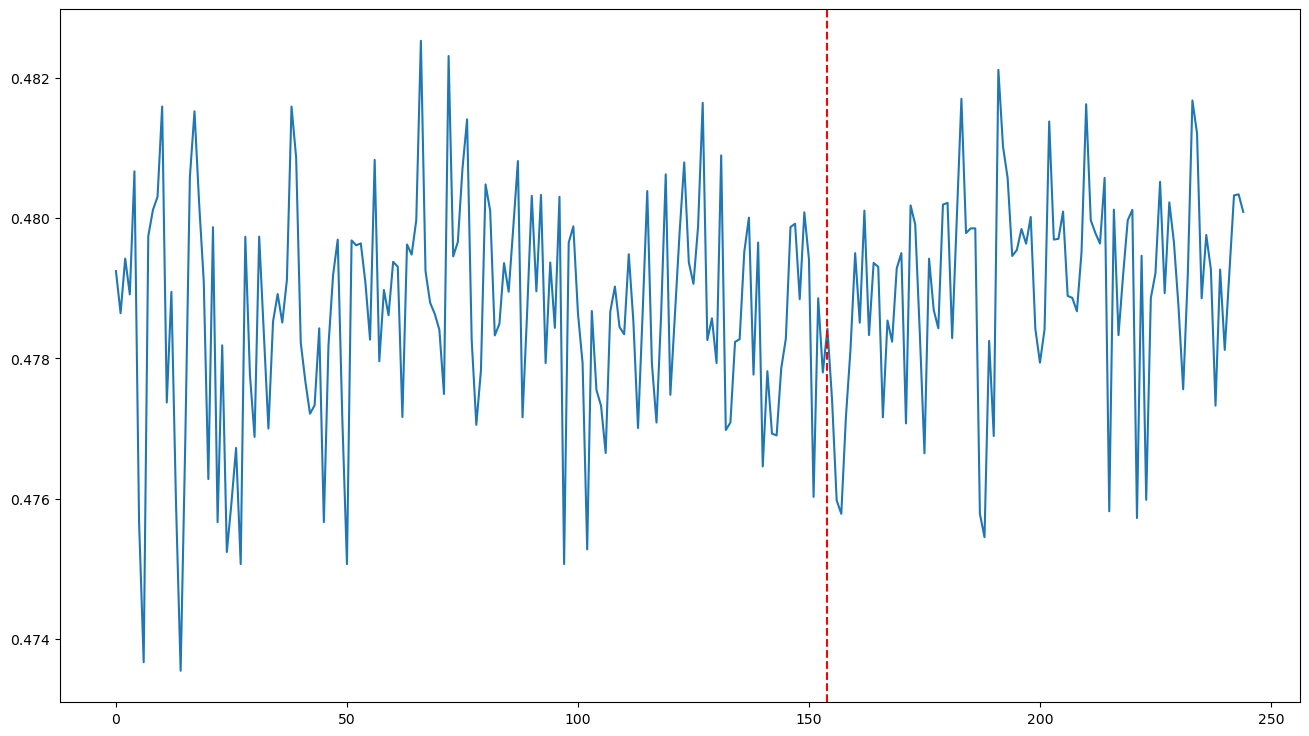

In [68]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor),color='r',linestyle="--")

In [69]:
eta=0.0001
EPOCH=400
optimizer=torch.optim.Adam(model.parameters(),lr=eta)
dataloader=DataLoader(mri_dataset,batch_size=32,shuffle=True)
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [70]:
# outputs = []
# y_true = []

# with torch.no_grad():
#     for i, D in enumerate(dataloader):
#         image = D['image'].permute(0, 3, 1, 2).to(device)  # Permute dimensions to [batch_size, channels, height, width]
#         label = D['label'].to(device)
#         print(f"Batch {i+1}: Image shape: {image.shape}")
#         y_hat = model(image)
#         outputs.append(y_hat.cpu().detach().numpy())
#         y_true.append(label.cpu().detach().numpy())
# len(outputs)
for epoch in range(1,EPOCH):
    losses=[]
    for D in dataloader:
        data=D['image'].permute(0, 3, 1, 2).to(device) 
        label=D['label'].to(device)
        y_hat=model(data)
        print(y_hat.shape)
        print(label.shape)

        

torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
t

torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
t

torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
t

torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
t

torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
t

torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
t

torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
t

torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
t

torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
t

torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
t

torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
t

torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
t

torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
t

torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([21, 1])
torch.Size([21])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 1])
torch.Size([32])
t

In [71]:
for epoch in range(1,EPOCH):
    losses=[]
    for D in dataloader:
        optimizer.zero_grad()
        data=D['image'].permute(0, 3, 1, 2).to(device) 
        label=D['label'].to(device)
        y_hat=model(data)
        error=nn.BCELoss()
        loss=torch.sum(error(y_hat.squeeze(),label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if(epoch+1)%10==0:
        print(f'Train Epoch {epoch+1} {np.mean(losses):.6f}')
        

Train Epoch 10 0.625333
Train Epoch 20 0.580600
Train Epoch 30 0.536402
Train Epoch 40 0.531548
Train Epoch 50 0.516368
Train Epoch 60 0.503603
Train Epoch 70 0.484447
Train Epoch 80 0.488497
Train Epoch 90 0.457541
Train Epoch 100 0.446697
Train Epoch 110 0.432336
Train Epoch 120 0.416976
Train Epoch 130 0.396508
Train Epoch 140 0.402387
Train Epoch 150 0.378588
Train Epoch 160 0.356083
Train Epoch 170 0.380567
Train Epoch 180 0.331204
Train Epoch 190 0.334571
Train Epoch 200 0.322395
Train Epoch 210 0.305111
Train Epoch 220 0.294532
Train Epoch 230 0.287927
Train Epoch 240 0.281802
Train Epoch 250 0.273423
Train Epoch 260 0.251782
Train Epoch 270 0.255748
Train Epoch 280 0.230047
Train Epoch 290 0.213825
Train Epoch 300 0.215645
Train Epoch 310 0.194034
Train Epoch 320 0.194538
Train Epoch 330 0.177668
Train Epoch 340 0.172711
Train Epoch 350 0.153792
Train Epoch 360 0.145758
Train Epoch 370 0.138941
Train Epoch 380 0.120768
Train Epoch 390 0.121162
Train Epoch 400 0.098739


In [72]:
accuracy_score(y_true,threshold(y_pred))*100

37.142857142857146

In [73]:

dataloader=DataLoader(mri_dataset,batch_size=32,shuffle=False)
model.eval()
outputs=[]
y_true=[]
with torch.no_grad():
    for i, D in enumerate(dataloader):
        image = D['image'].permute(0, 3, 1, 2).to(device)  # Permute dimensions to [batch_size, channels, height, width]
        label = D['label'].to(device)
        print(f"Batch {i+1}: Image shape: {image.shape}")
        y_hat = model(image)
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())
outputs=np.concatenate(outputs,axis=0)
y_true=np.concatenate(y_true,axis=0)

Batch 1: Image shape: torch.Size([32, 3, 128, 128])
Batch 2: Image shape: torch.Size([32, 3, 128, 128])
Batch 3: Image shape: torch.Size([32, 3, 128, 128])
Batch 4: Image shape: torch.Size([32, 3, 128, 128])
Batch 5: Image shape: torch.Size([32, 3, 128, 128])
Batch 6: Image shape: torch.Size([32, 3, 128, 128])
Batch 7: Image shape: torch.Size([32, 3, 128, 128])
Batch 8: Image shape: torch.Size([21, 3, 128, 128])


In [74]:
accuracy_score(y_true,threshold(outputs))*100
print(y_true)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


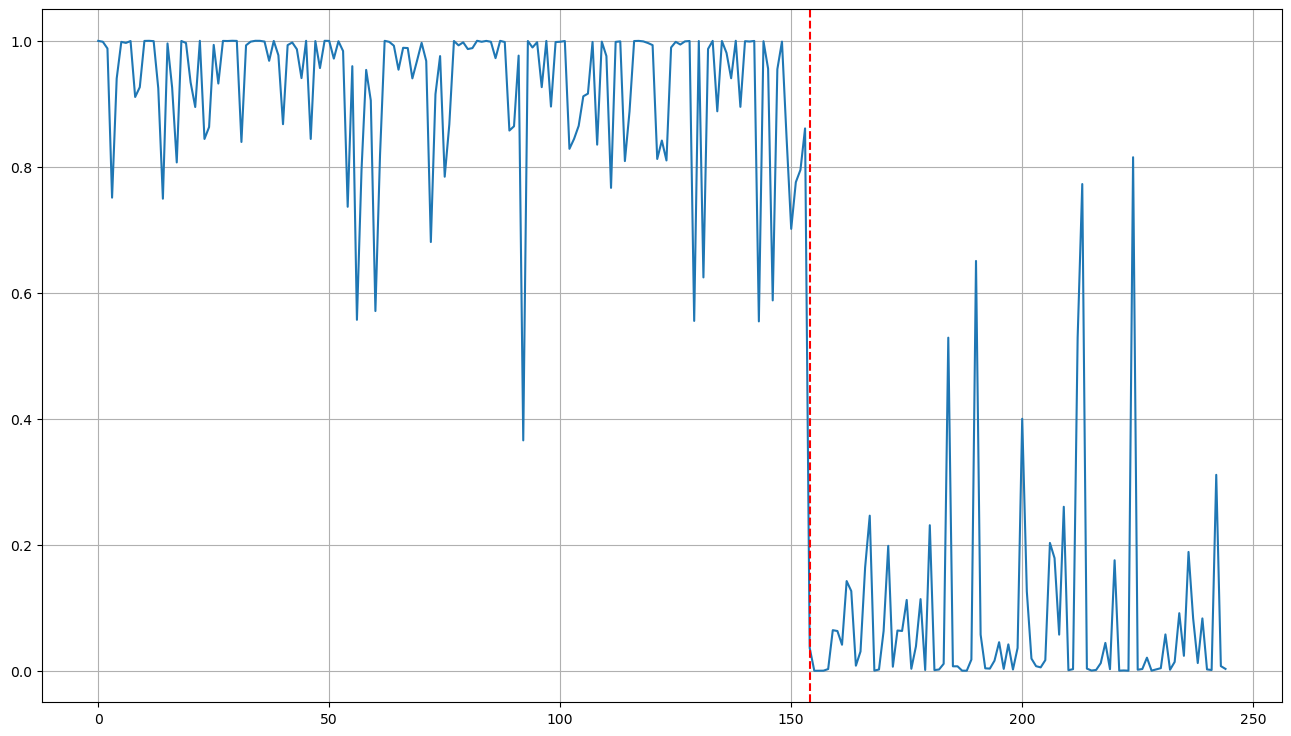

In [75]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor),color='r',linestyle='--')
plt.grid()

In [76]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [77]:

torch.save(model.state_dict(),'lljimodel.pth')

In [78]:
new_model=CNN()

In [79]:
new_model.load_state_dict(torch.load('lljimodel.pth'))

<All keys matched successfully>

In [80]:
import pickle

In [81]:
filename='savemodel.sav'

In [82]:
pickle.dump(model,open(filename,'wb'))

In [83]:
pickle

<module 'pickle' from 'E:\\anaconda\\Lib\\pickle.py'>

In [84]:
load_model=pickle.load(open(filename,'rb'))

In [85]:
img=mri[1]['image']

In [86]:
out=[]
tr=[]
image = D['image'].permute(0, 3, 1, 2).to(device)  # Permute dimensions to [batch_size, channels, height, width]
label = D['label'].to(device)
print(f"Batch {i+1}: Image shape: {image.shape}")
y_hat = model(image)
out.append(y_hat.cpu().detach().numpy())
tr.append(label.cpu().detach().numpy())


Batch 8: Image shape: torch.Size([21, 3, 128, 128])


In [87]:
def threshold(scores, threshold_value=0.50, minimum=0, maximum=1.0):
    x = np.array(scores)  # Convert scores to numpy array
    x[x >= threshold_value] = maximum
    x[x < threshold_value] = minimum
    return x

In [88]:
threshold(tr)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]], dtype=float32)

In [89]:
len(tr)

1

In [94]:
avg_value = np.mean(tr)